#### Importing Necessary Libraries

In [1]:
import numpy as np
import pydicom
import matplotlib.pyplot as plt
%matplotlib inline

#### Getting the Data In

In [2]:
data_file_of_last_slice_of_CT_scan = pydicom.dcmread('data/P1152/P1152_pCT_20140226_136.dcm') 
pixel_array = data_file_of_last_slice_of_CT_scan.pixel_array #pixel array of ct scan

May want to also try `read_file` function of pydicom (instead of `dcmread` later to see if that makes finding contours easier.

#### Exploring the Data Type and Shape

This is a **numpy array** of values that indicates the brightness of each pixel. This means all numpy array functions and numpy-compatible libraries (such as sk-image) can be used to analyze.

In [3]:
type(pixel_array)

numpy.ndarray

In [4]:
pixel_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

In [5]:
pixel_array.shape

(512, 512)

#### Exploring the Values of Pixels in the Array

In [6]:
print('The average value of a pixel in the array is {0:.0f}'.format(pixel_array.mean()))
print('The standard deviation of pixel values in the array is {0:.0f}'.format(pixel_array.std()))
print('The minimum value of a pixel in the array {}'.format(pixel_array.min()))
print('The maximum value of a pixel in the array {}'.format(pixel_array.max()))

The average value of a pixel in the array is 171
The standard deviation of pixel values in the array is 343
The minimum value of a pixel in the array 0
The maximum value of a pixel in the array 2607


#### Displaying the Image

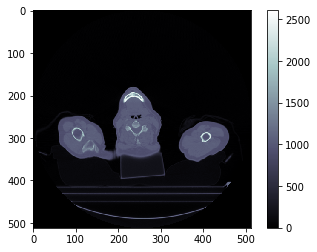

In [7]:
plt.imshow(pixel_array, cmap=plt.cm.bone)  # i like the cm
plt.colorbar()

#### Opening Up Contour Data

In [8]:
contour_file_for_all_onehundredthirtysix_scans = pydicom.dcmread('data/P1152/P1152_RTStructure_1.dcm') 

#### Let's Explore and Find the Contours

The contours we need are contained in a feature called `ROIContourSequence`. It is of type Sequence.

In [9]:
print('The type of ROIContourSequence    : {}'.format(str(type(contour_file_for_all_onehundredthirtysix_scans.ROIContourSequence))))
print('The type of ROIContourSequence[1] : {}'.format(str(type(contour_file_for_all_onehundredthirtysix_scans.ROIContourSequence[1]))))

The type of ROIContourSequence    : <class 'pydicom.sequence.Sequence'>
The type of ROIContourSequence[1] : <class 'pydicom.dataset.Dataset'>


This the first 'set' of contours corresponding to only one point: 'iso LUL'.

In [10]:
contour_file_for_all_onehundredthirtysix_scans.ROIContourSequence[0]

(3006, 002a) ROI Display Color                   IS: ['255', '0', '0']
(3006, 0040)  Contour Sequence   1 item(s) ---- 
   (3006, 0042) Contour Geometric Type              CS: 'POINT'
   (3006, 0046) Number of Contour Points            IS: '1'
   (3006, 0050) Contour Data                        DS: ['-6.3832092285156', '14.326019287109', '-688.07800292969']
   ---------
(3006, 0084) Referenced ROI Number               IS: '1'

It seems that the contours sit within 'DS':

In [11]:
contour_file_for_all_onehundredthirtysix_scans.ROIContourSequence[1]

(3006, 002a) ROI Display Color                   IS: ['0', '128', '255']
(3006, 0040)  Contour Sequence   32 item(s) ---- 
   (3006, 0016)  Contour Image Sequence   1 item(s) ---- 
      (0008, 1150) Referenced SOP Class UID            UI: CT Image Storage
      (0008, 1155) Referenced SOP Instance UID         UI: 2.16.840.1.114362.1.6.7.5.17616.11849865775.479250700.411.1419
      ---------
   (3006, 0042) Contour Geometric Type              CS: 'CLOSED_PLANAR'
   (3006, 0046) Number of Contour Points            IS: '68'
   (3006, 0050) Contour Data                        DS: ['-85.429992675781', '66.031005859375', '-655.5', '-85.31201171875', '65.914001464844', '-655.5', '-83.43798828125', '65.914001464844', '-655.5', '-83.320007324219', '66.031005859375', '-655.5', '-83.203002929688', '66.148010253906', '-655.5', '-82.968994140625', '66.148010253906', '-655.5', '-82.852005004883', '66.265991210938', '-655.5', '-82.733993530273', '66.383026123047', '-655.5', '-82.617004394531', '66.5